# [Multiclass Classification](http://scikit-learn.org/stable/modules/multiclass.html#multiclass)

## Review

You've done...

#### Regression

* Linear regression to predict weight from height
* **Multivariate** linear regresion to predict weight from height and gender

#### Binary Classification

If our data set contains only 2 genders, we have a binary classification problem.

* Logistic regression to predict gender (*categorical*) from height (*univariate continuous*)  
* Logistic regression to predict gender (*categorical*) from height and weight (*multivariate continuous*)

## Today

What do we do with are real-world data set with more than 2 genders?  
Or more than 2 colors?  
Or more than 2 types of endangered species?  
Or more than categories/classes of any type?  

Today you're going to do...

#### Multiclass Classification

* Predict crime (*multiclass*) from latitude (*univariate*)
* Predict crime (*multiclass*) from lat, lon, date, time, neighborhood (*multivariate*)

When we want to predict something that isn't just one class or another (binary), but has more than one category or class, we call that **Multiclass Classification**  


In [14]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [15]:
# df = pd.read_csv('https://raw.githubusercontent.com/hackoregon/hack-university-database-engineering/master/Data/Crime%20Data/crimedata.csv')
# del df['record_id']
# df.to_csv('../shared-resources/portland_crime.csv')
df = pd.read_csv('../shared-resources/portland_crime.csv', index_col=0, header=0)

In [16]:
df.head(3)

,report_date,report_time,major_offense_type,address,neighborhood,police_precinct,police_district,xcoordinate,ycoordinate
id,,,,,,,,,
10,2014-01-06,09:25:00,Sex Offenses,Unknown/Not Available,SOUTH PORTLAND,PORTLAND PREC CE,890,NaN,NaN
11,2014-01-05,17:53:00,Liquor Laws,"SW ALDER ST and SW 10TH AVE, PORTLAND, OR 97205",DOWNTOWN,PORTLAND PREC CE,842,7.642970e+06,683475.64534
12,2014-01-23,22:15:00,Burglary,"251-399 block of NE 80TH AVE, PORTLAND, OR 97213",MONTAVILLA,PORTLAND PREC EA,902,7.668701e+06,684231.79199


In [17]:
df.describe()

,xcoordinate,ycoordinate
count,5.396300e+04,53963.000000
mean,7.655826e+06,684865.814018
std,1.611395e+04,11582.723344
min,7.568600e+06,588728.800520
25%,7.643957e+06,678147.698490
50%,7.650161e+06,684086.216210
75%,7.669203e+06,689327.735240
max,7.717426e+06,726347.339900


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ad401d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ec2fac8>]], dtype=object)

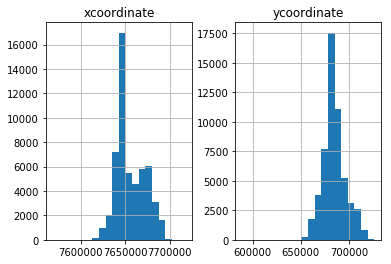

In [18]:
df.hist(bins=20)

So we only have 3 numerical features to work with?  
And one of them is useless (**id**)!

#### **NOTE:** IDs are not always useless.

One Kaggle competition was won by a machine that figured out that the ID contained the answer!  
IDs often contain information about when the records were inserted into the DB.


## Datetimes (Pandas **Timestamp**)

There are lots of [numerical features](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) we can extract from datetimes (Timestamp) objects

* year
* month
* day of month
* day of year
* day of week
* is it a holiday
* is it a weekday

...

In [19]:
pd.to_datetime(df.report_date).describe()

count                   61497
unique                    365
top       2014-01-01 00:00:00
freq                      299
first     2014-01-01 00:00:00
last      2014-12-31 00:00:00
Name: report_date, dtype: object

In [20]:
df['report_date'] = pd.to_datetime(df.report_date + ' ' + df.report_time)
df.head(3)

,report_date,report_time,major_offense_type,address,neighborhood,police_precinct,police_district,xcoordinate,ycoordinate
id,,,,,,,,,
10,2014-01-06 09:25:00,09:25:00,Sex Offenses,Unknown/Not Available,SOUTH PORTLAND,PORTLAND PREC CE,890,NaN,NaN
11,2014-01-05 17:53:00,17:53:00,Liquor Laws,"SW ALDER ST and SW 10TH AVE, PORTLAND, OR 97205",DOWNTOWN,PORTLAND PREC CE,842,7.642970e+06,683475.64534
12,2014-01-23 22:15:00,22:15:00,Burglary,"251-399 block of NE 80TH AVE, PORTLAND, OR 97213",MONTAVILLA,PORTLAND PREC EA,902,7.668701e+06,684231.79199


## What about categories like neighborhood?

`pd.get_dummies` can convert any categorical variable to separate binary class variables, one in each column.  
`pd.concat` can combine multiple tables into one


So let's add the neighborhood

**NOTE:** Only do this for *categorical* variables, **not** *ordinals*

In [21]:
df.neighborhood.value_counts()

DOWNTOWN                     5394
HAZELWOOD                    3727
CHINA/OLD TOWN               3243
LENTS                        2513
POWELHST-GILBRT              2437
CENTENNIAL                   2076
NORTHWEST                    2047
PEARL                        1549
LLOYD                        1542
MONTAVILLA                   1374
BUCKMAN-WEST                 1318
ST JOHNS                     1281
CULLY                        1149
RICHMOND                     1035
PARKROSE                     1013
ELIOT                         933
HOSFRD-ABRNETHY               878
BRENTWD-DARLNGT               831
KERNS                         822
MILL PARK                     817
PORTSMOUTH                    737
OVERLOOK                      708
FOSTER-POWELL                 695
GOOSE HOLLOW                  681
KENTON                        667
SELLWD-MORELAND               658
KING                          656
CRSTN-KENILWTH                655
SUNNYSIDE                     635
HAYDEN ISLAND 

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.neighborhood)
# df['neighborhood_int'] = le.transform(df.neighborhood)

TypeError: '>' not supported between instances of 'str' and 'float'

In [32]:
neighborhood = pd.get_dummies(df['neighborhood'])
neighborhood.head(3)

,ALAMEDA,ARBOR LODGE,ARDENWALD,ARGAY,ARLINGTON HGHTS,ARNOLD CREEK,ASHCREEK,BEAUMONT-WILSHR,BEAVERTON - FIVE OAKS 3C,BOISE,...,TUALATIN - TU3,UNIVERSITY PARK,VERNON,W PORTLAND PARK,WEST BEAVERTON,WILKES,WOODLAND PARK,WOODLAWN,WOODSTOCK,WSLOT
id,,,,,,,,,,,,,,,,,,,,,
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.concat([df, neighborhood], axis=1)

In [ ]:
df.describe()

In [ ]:
df_crime = pd.get_dummies(df2.major_offense_type)
df_crime.describe()

In [ ]:
# another way to convert a class into a number
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df2.major_offense_type)
df2['major_offense_type_int'] = le.transform(df2.major_offense_type) 

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df2 = df.dropna(how='any').copy()
X = df2[['xcoordinate', 'ycoordinate'] + list(neighborhood.columns)]
y=df_crime
lr = lr.fit(X, y)
lr.score(X, y)

In [ ]:
predicted_crime = pd.DataFrame(lr.predict(X), columns=df_crime.columns)
predicted_crime.describe()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', solver='lbfgs', multi_class='multinomial')
y = df2.major_offense_type.values.reshape(-1, 1)
print(y.shape)
lr = lr.fit(X, y)  # .values[:,1].reshape(-1,1))
lr.score(X, y)

In [ ]:
df = pd.read_csv('../shared-resources/portland_crime.csv', index_col='id', header=0)
del df['Unnamed: 0']

In [ ]:
df.to_csv('../shared-resources/portland_crime.csv')
print(df.columns[4])
df[df.columns[4]]


In [ ]:
df['report_date'][10]